In [44]:
import osmnx as ox
import networkx as nx
from astar import AStar
from haversine import haversine
import matplotlib.pyplot as plt
import folium
from folium.plugins import BeautifyIcon

In [14]:
class MapGraph(AStar):
    def __init__(self,graph):
        self.graph = graph

    def heuristic_cost_estimate(self, n1, n2) -> float:
        if isinstance(n1, int):
            n1 = self.graph.nodes[n1]['x'], self.graph.nodes[n1]['y']
        if isinstance(n2, int):
            n2 = self.graph.nodes[n2]['x'], self.graph.nodes[n2]['y']
        x1, y1 = n1
        x2, y2 = n2
        return haversine((y1, x1), (y2, x2))
    
    def distance_between(self, n1, n2):
        if 'length' in self.graph[n1][n2]:
            return self.graph[n1][n2]['length']
        else:
            return 99999999 # return a large number if 'length' attribute is not present
    
    def neighbors(self, node):
        return list(self.graph.neighbors(node))

In [21]:
G = ox.graph_from_place("South Bengaluru, India", network_type='drive')

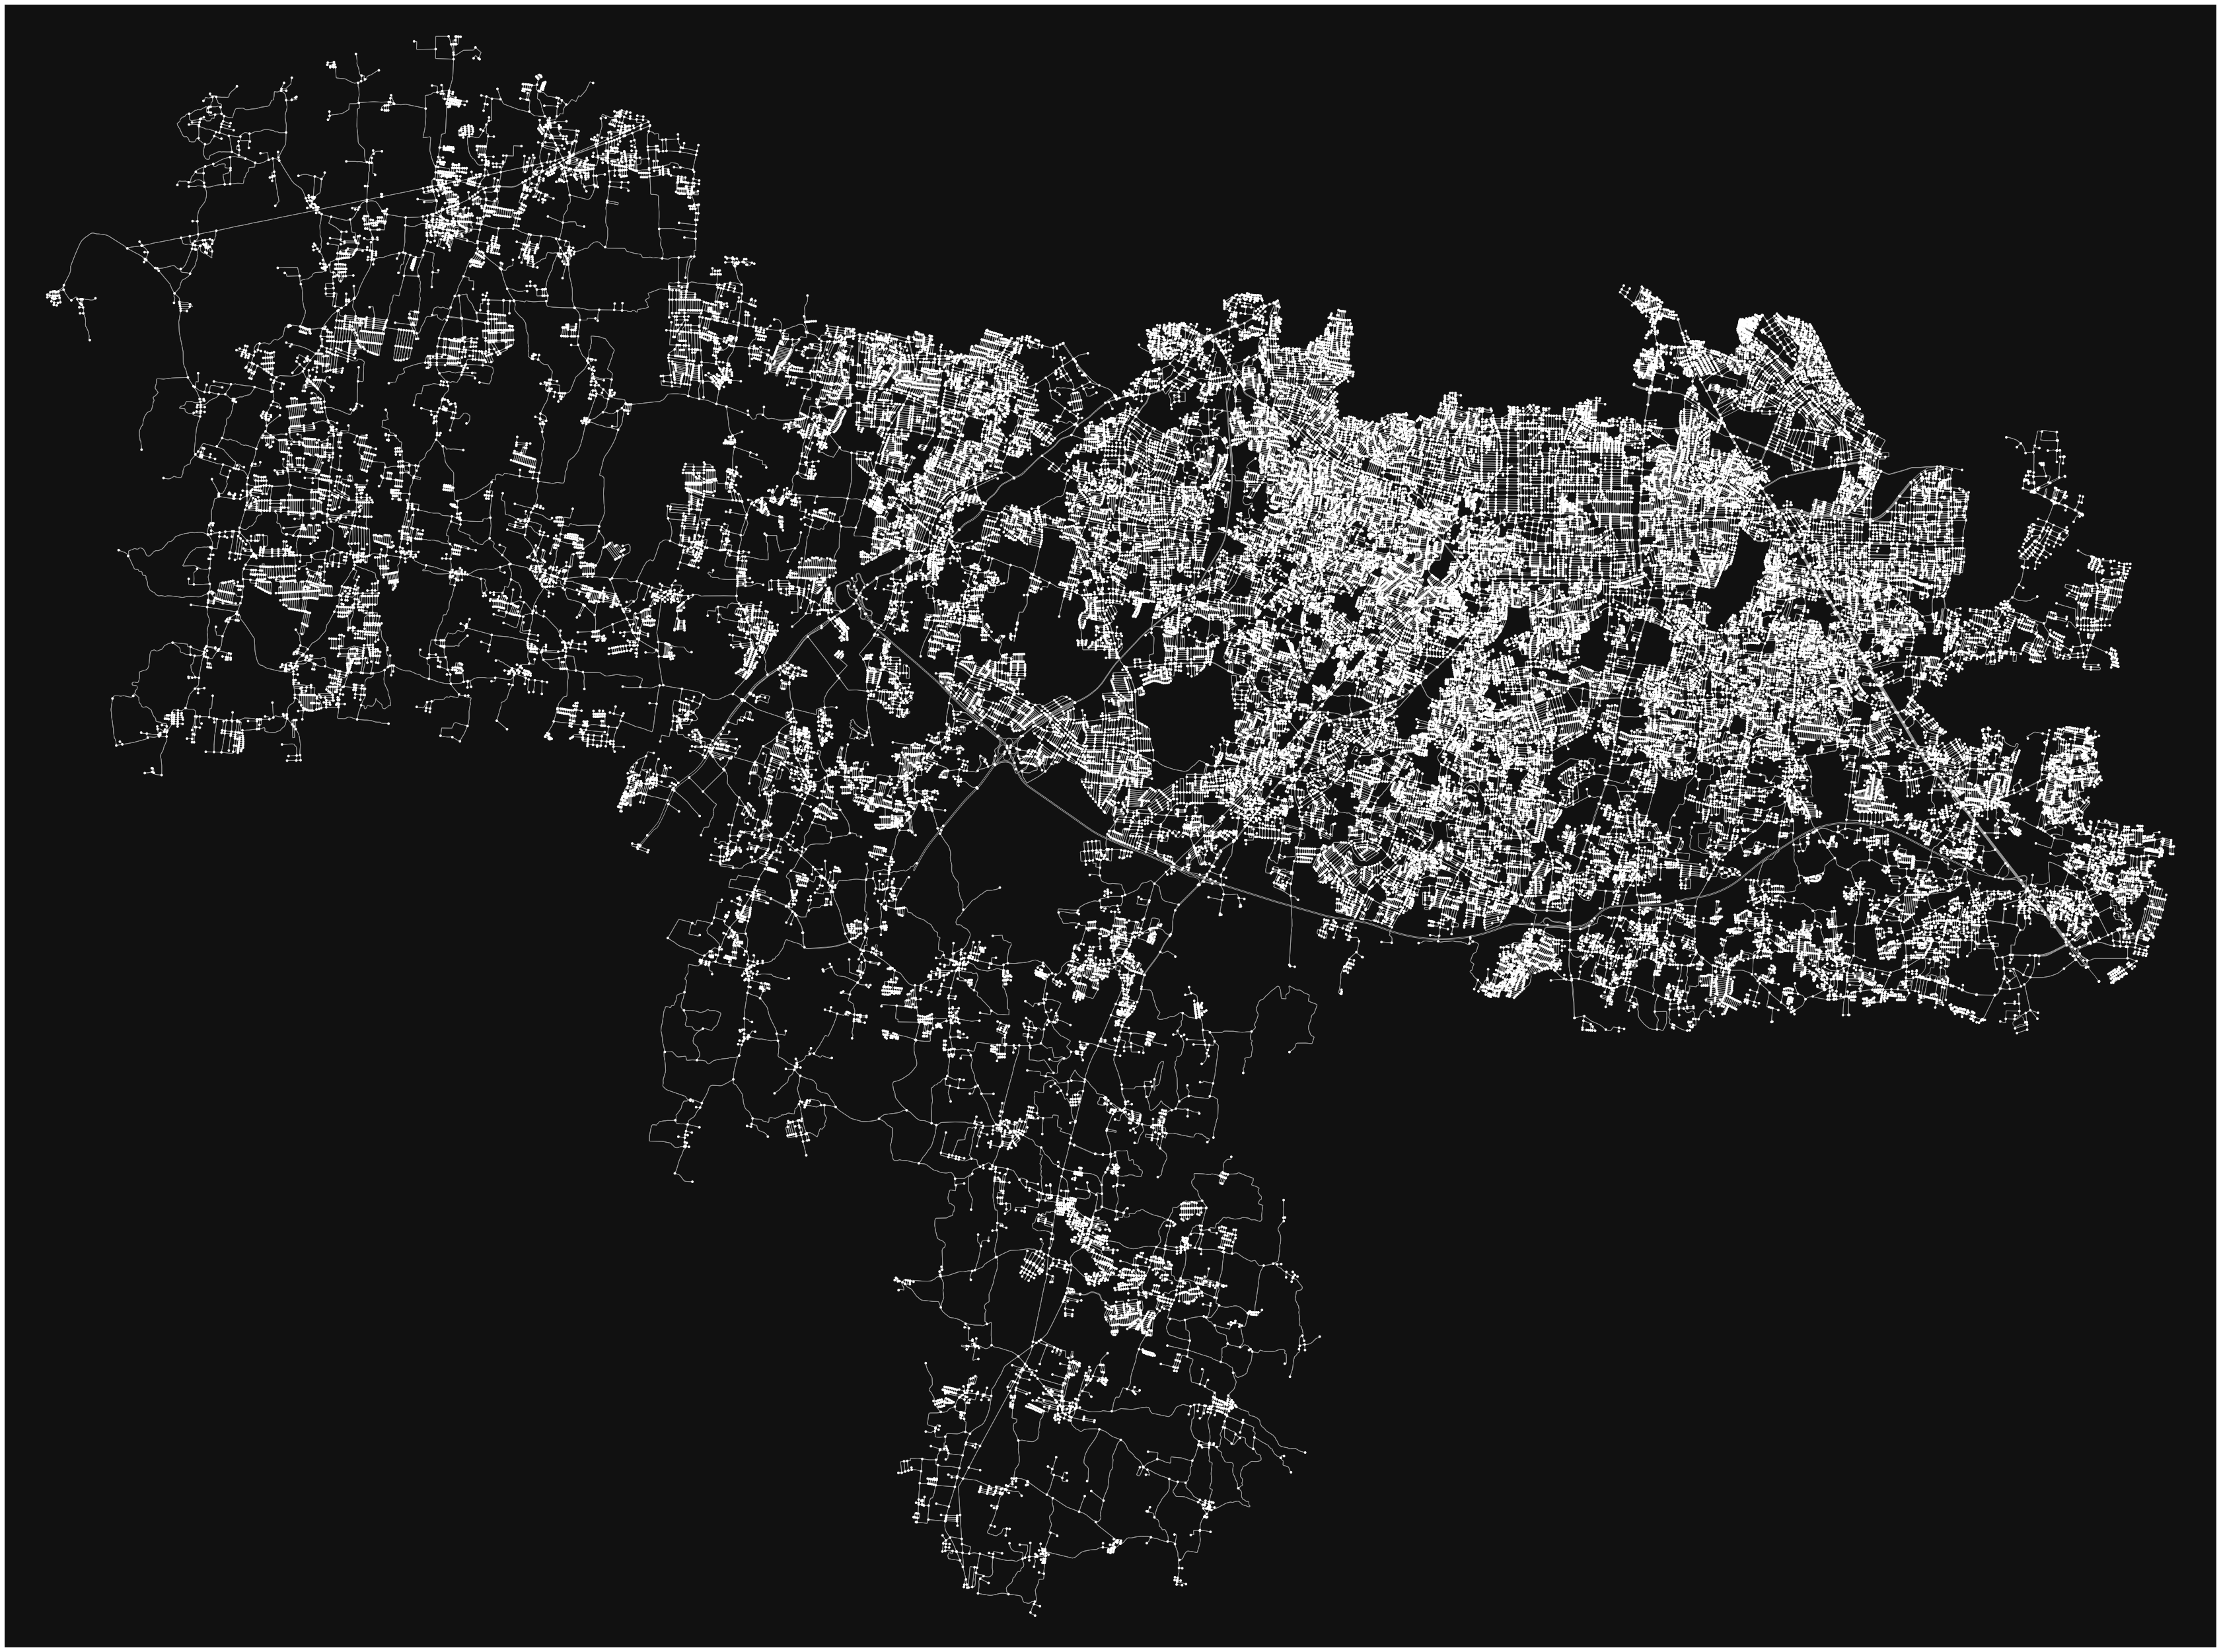

(<Figure size 4320x4320 with 1 Axes>, <AxesSubplot:>)

In [25]:
ox.plot.plot_graph(G, figsize=(60,60))

In [26]:
source_coord = (12.903203, 77.648572)
dest_coord = (12.924499, 77.558279)

In [27]:
start_node = ox.distance.nearest_nodes(G, source_coord[1], source_coord[0])
goal_node = ox.distance.nearest_nodes(G, dest_coord[1], dest_coord[0])

In [28]:
astar = MapGraph(G)
path = astar.astar(start_node, goal_node)
path = list(path)

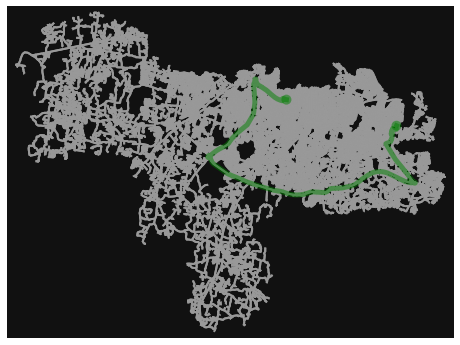

In [35]:
route = ox.plot_graph_route(G, path, route_color='green', route_linewidth=5, edge_linewidth=2, node_size = 0)

In [50]:
m = folium.Map(location=(12.903203, 77.648572), zoom_start=12)

In [51]:
folium.Marker(location=(12.903203, 77.648572)).add_to(m)
folium.Marker(location=(12.924499, 77.558279)).add_to(m)

266164920
274581340
9788266471
2127279472
7467099512
306623857
7467099510
1417443312
7467099508
1417443309
7467099504
7466389415
7466389416
1417443290
6144334982
7466389468
7466389466
7469425160
10091831469
10091831472
4142533495
1417340858
1417340857
1417340852
10091831457
7466389299
7466389297
618251411
9820351003
695118045
9491361037
9491361038
3950397233
459501924
265508859
1720796234
1720796272
7463893321
841805564
1659180109
841805603
841805639
265518303
2396285208
2396262063
841805651
1942854026
1942843613
10695037230
1836983204
1836983267
1836983319
733498647
514455514
6449168616
6484995887
6484995894
4219267228
699684282
1836982983
7424568630
699684258
699684243
2421937541
249072291
1466497856
10135489846
7424568649
2421937556
1466575036
1466575043
1466575034
1466575046
249080887
1466575048
2421937542
10089423826
10089423828
